In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/new_dataset.csv')

In [ ]:
new_df=df.dropna(axis=0, how='any')

In [ ]:
new_df.head()

,ccode_x,year,milex,milper,irst,pec,tpop,upop,cinc,ccode_y,statename,imports,exports,AtWar
0,2,1870,13128,50,1692,37779,39905,4130,0.099000,2,170,450.000000,418.000000,0
1,2,1871,11811,42,1735,39546,40938,4302,0.098381,2,170,534.000000,475.000000,0
2,2,1872,14246,42,2590,48479,41972,4481,0.115283,2,170,632.000000,474.000000,0
3,2,1873,15014,43,2602,53674,43006,4667,0.116269,2,170,342.029999,626.590027,0
4,2,1874,12899,44,2439,51736,44040,4862,0.114245,2,170,576.000000,619.000000,0


In [ ]:
x = new_df.drop('AtWar', axis=1)
y = new_df.AtWar

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
x

array([[-1.55191318, -2.51302071, -0.13537457, ...,  1.56012933,
        -0.18868167, -0.20027583],
       [-1.55191318, -2.48634409, -0.13543185, ...,  1.56012933,
        -0.18781535, -0.19963118],
       [-1.55191318, -2.45966747, -0.13532594, ...,  1.56012933,
        -0.18680465, -0.19964249],
       ...,
       [ 2.32015965,  1.22170586, -0.13594561, ...,  0.84958487,
        -0.18856683, -0.20348735],
       [ 2.32015965,  1.24838247, -0.13594561, ...,  0.84958487,
        -0.18823787, -0.20343991],
       [ 2.32015965,  1.27505909, -0.13594561, ...,  0.84958487,
        -0.18817184, -0.20330989]])

In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.291654,2.782440
1,0.294194,2.772055
2,0.470488,2.814386
3,0.494742,2.808767
4,0.481152,2.792842


In [ ]:
principalDf = principalDf.dropna(axis=0, how='any')

In [ ]:
df[['AtWar']].head()

,AtWar
0,0
1,0
2,0
3,0
4,0


In [ ]:
finalDf = pd.concat([principalDf, df[['AtWar']]], axis = 1)
finalDf.head(5)
finalDf.tail(25)

,principal component 1,principal component 2,AtWar
12215,-0.602570,-3.349853,0
12216,-0.601062,-3.357545,0
12217,-0.599601,-3.365236,0
12218,-0.598079,-3.372925,0
12219,-0.596610,-3.380623,0
12220,-0.595200,-3.388328,0
12221,-0.593277,-3.395983,0
12222,-0.591702,-3.403668,0
12223,-0.590273,-3.411372,0
12224,-0.588718,-3.419068,0


In [ ]:
#finalDf = finalDf.dropna(axis=0, how='any')

In [ ]:
finalDf.tail(25)

,principal component 1,principal component 2,AtWar
12215,-0.602570,-3.349853,0
12216,-0.601062,-3.357545,0
12217,-0.599601,-3.365236,0
12218,-0.598079,-3.372925,0
12219,-0.596610,-3.380623,0
12220,-0.595200,-3.388328,0
12221,-0.593277,-3.395983,0
12222,-0.591702,-3.403668,0
12223,-0.590273,-3.411372,0
12224,-0.588718,-3.419068,0


<Figure size 432x288 with 0 Axes>

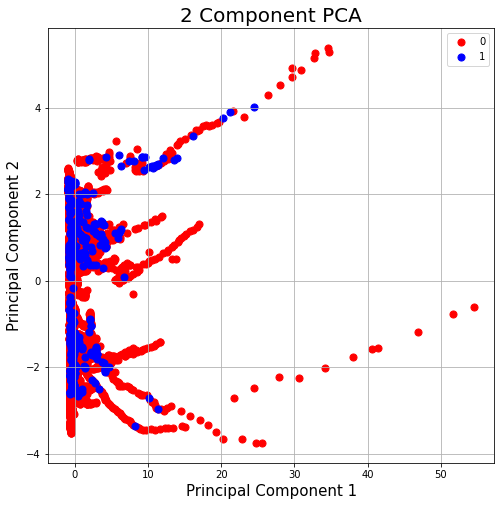

In [ ]:
plt.figure()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['AtWar'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.4076906 , 0.16976385])